## Steps of Time Series Analysis

1. Basic Data Check
   
    (DataFrame, No Nulls)

2. Visualize and Decompose

3. Seasonlity
    - Find the "Shiftdiff"
    - to make it stationary (Rolling mean+std, ADF Test)

4. ARIMA
    - PACF
    - ACF

5. SARIMAX

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/HDFC-RSE.csv')

In [3]:
#@title{vertical-output:true}
df.head(10)

,NAV Date,NAV (Rs)
0,28-06-2024,54.463
1,27-06-2024,54.528
2,26-06-2024,54.545
3,25-06-2024,54.589
4,24-06-2024,54.273
5,21-06-2024,54.170
6,20-06-2024,54.316
7,19-06-2024,54.140
8,18-06-2024,54.143
9,14-06-2024,53.891


In [4]:
#@title{vertical-output:true}
df.tail(10)

,NAV Date,NAV (Rs)
2042,11-03-2016,10.516
2043,10-03-2016,10.495
2044,09-03-2016,10.564
2045,08-03-2016,10.498
2046,04-03-2016,10.531
2047,03-03-2016,10.478
2048,02-03-2016,10.362
2049,01-03-2016,10.196
2050,29-02-2016,10.017
2051,26-02-2016,9.997


In [5]:
#@title{vertical-output:true}
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAV Date  2052 non-null   object 
 1   NAV (Rs)  2052 non-null   float64
dtypes: float64(1), object(1)
memory usage: 32.2+ KB


In [6]:
df['NAV Date'] = pd.to_datetime(df['NAV Date'], format='%d-%m-%Y')

In [7]:
df.set_index('NAV Date', inplace=True)

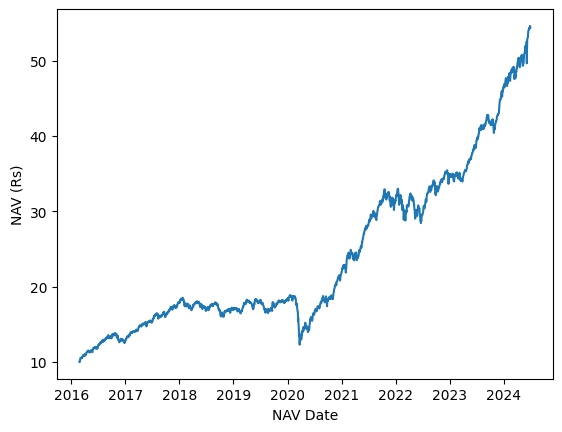

In [8]:
#@title{vertical-output:true}
plt.figure()
sns.lineplot(data=df, x=df.index, y=df['NAV (Rs)'])
plt.show()

In [9]:
!pip install statsmodels

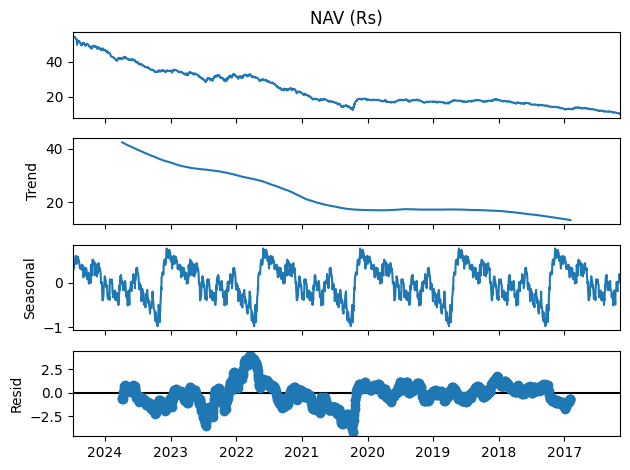

In [10]:
#@title{vertical-output:true}
#check further for seasonality and trend
from statsmodels.tsa.seasonal import seasonal_decompose
decmoposition = seasonal_decompose(df['NAV (Rs)'], period=365)
fig = decmoposition.plot()
plt.show()

In [11]:
#@title{vertical-output:true}
def test_stationarity(df_par, var):
    dataFrame=df_par.copy()
    dataFrame['rollMean'] = dataFrame[var].rolling(window = 12).mean()
    dataFrame['rollStd'] = dataFrame[var].rolling(window = 12).mean()
    print(dataFrame.iloc[12:])
    from statsmodels.tsa.stattools import adfuller

    adfTest = adfuller(dataFrame[var])
    print(adfTest)

    stats = pd.Series(adfTest[0:4], index=['Test Statistic', 'p-vale', '#lags used', 'number of observations used'])
    print(stats)

    for key, values in adfTest[4].items():
        print("criticality", key, ":", values)

    plt.figure(figsize=(8,6))
    sns.lineplot(data = dataFrame, x = dataFrame.index, color='blue', y = var)
    sns.lineplot(data = dataFrame, x = dataFrame.index, color='red', y = 'rollMean')
    sns.lineplot(data = dataFrame, x = dataFrame.index, color='green', y = 'rollStd')
    plt.show()
    return dataFrame

            NAV (Rs)   shift  shiftDiff
NAV Date                               
2024-06-28    54.463     NaN        NaN
2024-06-27    54.528  54.463      0.065
2024-06-26    54.545  54.528      0.017
2024-06-25    54.589  54.545      0.044
2024-06-24    54.273  54.589     -0.316
2024-06-21    54.170  54.273     -0.103
2024-06-20    54.316  54.170      0.146
2024-06-19    54.140  54.316     -0.176
2024-06-18    54.143  54.140      0.003
2024-06-14    53.891  54.143     -0.252
2024-06-13    53.548  53.891     -0.343
2024-06-12    53.312  53.548     -0.236
2024-06-11    53.040  53.312     -0.272
2024-06-10    53.020  53.040     -0.020
2024-06-07    52.867  53.020     -0.153
2024-06-06    51.986  52.867     -0.881
2024-06-05    51.246  51.986     -0.740
2024-06-04    49.628  51.246     -1.618
2024-06-03    52.509  49.628      2.881
2024-05-31    51.157  52.509     -1.352
            NAV (Rs)   shift  shiftDiff  rollMean   rollStd
NAV Date                                                   


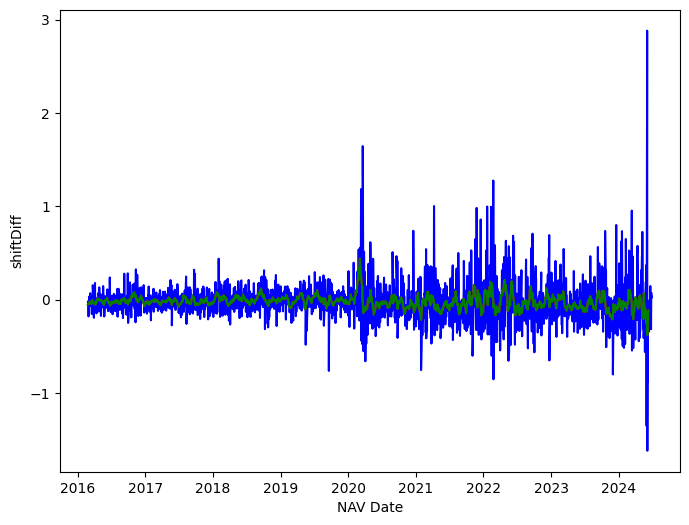

            NAV (Rs)   shift  shiftDiff  rollMean   rollStd
NAV Date                                                   
2024-06-07    52.867  53.040     -0.173 -0.265500 -0.265500
2024-06-06    51.986  53.020     -1.034 -0.356750 -0.356750
2024-06-05    51.246  52.867     -1.621 -0.469167 -0.469167
2024-06-04    49.628  51.986     -2.358 -0.630750 -0.630750
2024-06-03    52.509  51.246      1.263 -0.529083 -0.529083
...              ...     ...        ...       ...       ...
2016-03-03    10.478  10.498     -0.020 -0.066667 -0.066667
2016-03-02    10.362  10.531     -0.169 -0.076083 -0.076083
2016-03-01    10.196  10.478     -0.282 -0.084000 -0.084000
2016-02-29    10.017  10.362     -0.345 -0.091917 -0.091917
2016-02-26     9.997  10.196     -0.199 -0.096333 -0.096333

[2038 rows x 5 columns]
(-7.710883887611683, 1.2648198322230296e-11, 26, 2023, {'1%': -3.433586587734614, '5%': -2.8629697591275196, '10%': -2.5675311411427995}, -630.4553757043823)
Test Statistic                -7.7108

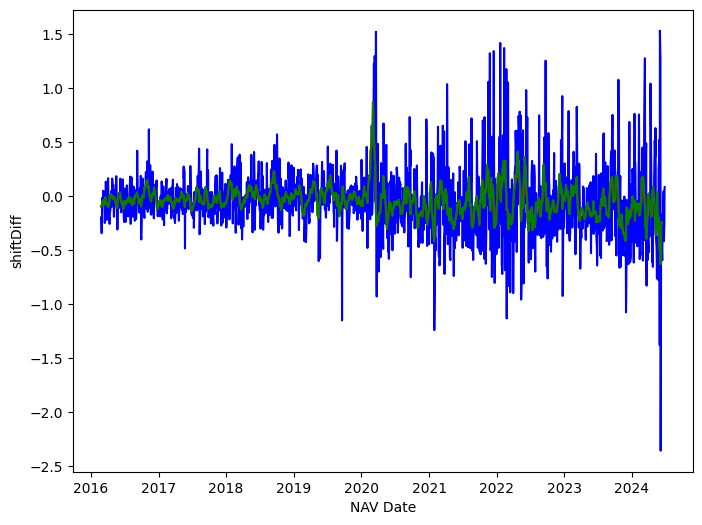

            NAV (Rs)   shift  shiftDiff
NAV Date                               
2024-06-28    54.463     NaN        NaN
2024-06-27    54.528     NaN        NaN
2024-06-26    54.545  54.463      0.082
2024-06-25    54.589  54.528      0.061
2024-06-24    54.273  54.545     -0.272
2024-06-21    54.170  54.589     -0.419
2024-06-20    54.316  54.273      0.043
2024-06-19    54.140  54.170     -0.030
2024-06-18    54.143  54.316     -0.173
2024-06-14    53.891  54.140     -0.249
2024-06-13    53.548  54.143     -0.595
2024-06-12    53.312  53.891     -0.579
2024-06-11    53.040  53.548     -0.508
2024-06-10    53.020  53.312     -0.292
2024-06-07    52.867  53.040     -0.173
2024-06-06    51.986  53.020     -1.034
2024-06-05    51.246  52.867     -1.621
2024-06-04    49.628  51.986     -2.358
2024-06-03    52.509  51.246      1.263
2024-05-31    51.157  49.628      1.529


In [12]:
#@title{vertical-output: true}

df_test = df[['NAV (Rs)']].copy()

df_test['shift'] = df_test['NAV (Rs)'].shift(1)
df_test['shiftDiff'] = df_test['NAV (Rs)'] - df_test['shift']
print(df_test.head(20))
test_stationarity(df_test.dropna(), 'shiftDiff')




df_test['shift'] = df_test['NAV (Rs)'].shift(2)
df_test['shiftDiff'] = df_test['NAV (Rs)'] - df_test['shift']

test_stationarity(df_test.dropna(), 'shiftDiff')
print(df_test.head(20))

            NAV (Rs)   shift  shiftDiff  rollMean   rollStd
NAV Date                                                   
2024-06-07    52.867  53.040     -0.173 -0.265500 -0.265500
2024-06-06    51.986  53.020     -1.034 -0.356750 -0.356750
2024-06-05    51.246  52.867     -1.621 -0.469167 -0.469167
2024-06-04    49.628  51.986     -2.358 -0.630750 -0.630750
2024-06-03    52.509  51.246      1.263 -0.529083 -0.529083
...              ...     ...        ...       ...       ...
2016-03-03    10.478  10.498     -0.020 -0.066667 -0.066667
2016-03-02    10.362  10.531     -0.169 -0.076083 -0.076083
2016-03-01    10.196  10.478     -0.282 -0.084000 -0.084000
2016-02-29    10.017  10.362     -0.345 -0.091917 -0.091917
2016-02-26     9.997  10.196     -0.199 -0.096333 -0.096333

[2038 rows x 5 columns]
(-7.710883887611683, 1.2648198322230296e-11, 26, 2023, {'1%': -3.433586587734614, '5%': -2.8629697591275196, '10%': -2.5675311411427995}, -630.4553757043823)
Test Statistic                -7.7108

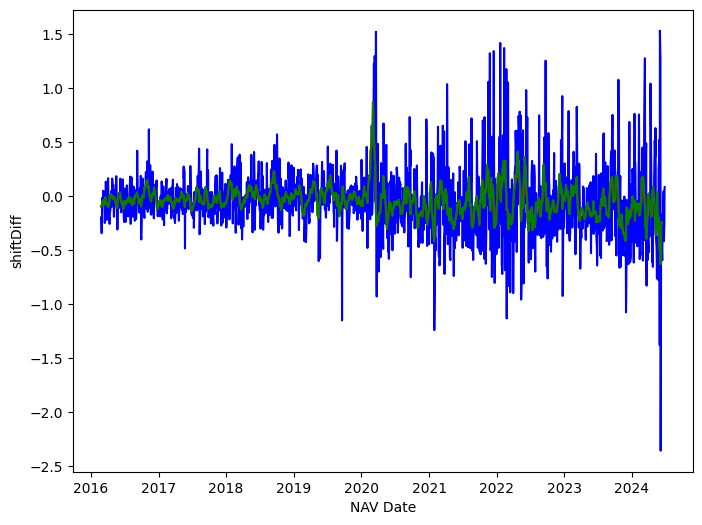

,NAV (Rs),shift,shiftDiff,rollMean,rollStd
NAV Date,,,,,
2024-06-26,54.545,54.463,0.082,NaN,NaN
2024-06-25,54.589,54.528,0.061,NaN,NaN
2024-06-24,54.273,54.545,-0.272,NaN,NaN
2024-06-21,54.170,54.589,-0.419,NaN,NaN
2024-06-20,54.316,54.273,0.043,NaN,NaN
...,...,...,...,...,...
2016-03-03,10.478,10.498,-0.020,-0.066667,-0.066667
2016-03-02,10.362,10.531,-0.169,-0.076083,-0.076083
2016-03-01,10.196,10.478,-0.282,-0.084000,-0.084000


In [13]:
#@title{vertical-output:true}
test_stationarity(df_test.dropna(), 'shiftDiff')

            NAV (Rs)  firstDiff  Diff12
NAV Date                               
2024-06-28    54.463        NaN     NaN
2024-06-27    54.528      0.065     NaN
2024-06-26    54.545      0.017     NaN
2024-06-25    54.589      0.044     NaN
2024-06-24    54.273     -0.316     NaN


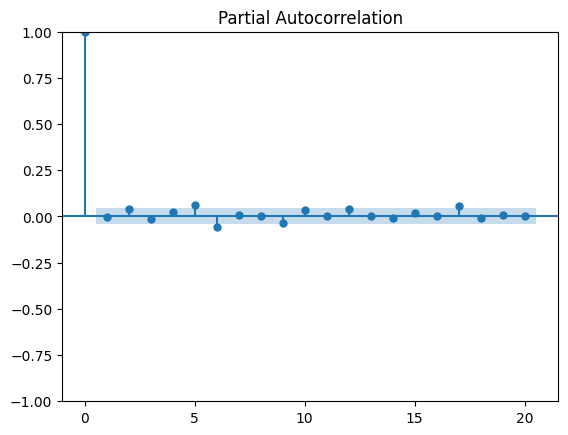

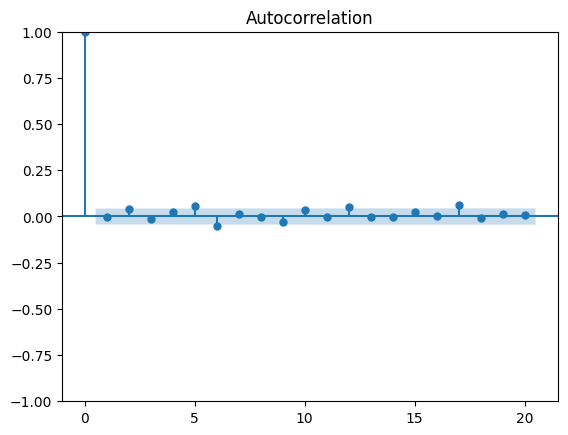

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

            NAV (Rs)  firstDiff  Diff12  arimaPred
NAV Date                                          
2016-03-03    10.478     -0.053  -0.415        NaN
2016-03-02    10.362     -0.116  -0.498        NaN
2016-03-01    10.196     -0.166  -0.510        NaN
2016-02-29    10.017     -0.179  -0.593        NaN
2016-02-26     9.997     -0.020  -0.563        NaN


In [14]:
#@title{vertical-output:true}
# Now ARIMA: In google colab, you may need Ipip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

airp = df[['NAV (Rs)']].copy(deep=True)
airp['firstDiff'] = airp['NAV (Rs)'].diff()
airp['Diff12'] = airp['NAV (Rs)'].diff(12) #This will be used later in SARIMAX

print(airp.head())
plot_pacf(airp['firstDiff'].dropna(),lags=20)
plt.show()

plot_acf(airp['firstDiff'].dropna(),lags=20)
plt.show()

#Build ARIMA model

train = airp[:round (len(airp) *70/100)] # Take the first 70% data print(train.tail()) # Just to check where it ends
test = airp[round (len(airp) *70/100):] # Take the last 30% data, starting from 71% print(test.head()) # Just to check where it starts
model = ARIMA(train ['NAV (Rs)'], order=(1,2,1)) # Parameters: p, d, q

model_fit = model.fit()
start_date = train.index[0]
end_date = train.index[-1]
prediction = model_fit.predict(start=start_date, end=end_date)
airp['arimaPred'] = prediction
print(airp.tail())

In [ ]:
#@title{vertical-output:true}
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Now SARIMAX prediction
airP = df[['NAV (Rs)']].copy(deep=True)
model = SARIMAX(train ['NAV (Rs)'], order=(5,5,1), seasonal_order=(5,5,1,365))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['sarimaxPred'] = prediction
print(airP.tail())

#Data looks better

# Plot

airp.dropna()
print(airp.head())
sns.lineplot(data=airP,x=airp.index,y='NAV (Rs)')
sns.lineplot(data=airP, x=airp.index,y='sarimaxPred')
sns.lineplot(data=airp, x=airP.index,y='arimaPred')

plt.show()

# Compared to ARIMA, SARIMAX is much better
# Future prediction: first check the last date in our dataset
print(airP.tail())
#MS: Month Start frequency
#Creae a datea frame to hold index values from 01.01.61 to 01.12.62
# Corrected the date range to start from an earlier date and end at a later date
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1962-12-01', freq='MS'), columns=['Dates'])
futureDate.set_index('Dates', inplace=True)
print(futureDate.head())

# Predict and print
print(model_fit.predict(start=futureDate.index[0], end=futureDate.index[-1]))
# Plot
airp.dropna()
plt.figure(figsize=(10,6))
sns.lineplot(data=airP, x=airp.index, y='NAV (Rs)')
sns.lineplot(data=airP, x=airP.index, y='sarimaxPred')
model_fit.predict(start=futureDate.index[0], end=futureDate.index[-1]).plot(color='black')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm